Saiteja vasireddy 

In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('aqi_india.csv')

# Check data loaded correctly
print(f"Total rows: {len(df)}")
print(f"Cities: {df['city'].nunique()}")
df.head()

Total rows: 192
Cities: 16


,city,state,date,aqi,aqi_category,pm25,pm10,no2,so2,co,o3
0,Delhi,Delhi,2024-01-01,385,Hazardous,290,420,85,42,3.2,28
1,Delhi,Delhi,2024-01-15,342,Hazardous,258,380,78,38,2.9,25
2,Delhi,Delhi,2024-02-01,298,Very Unhealthy,225,340,72,35,2.6,30
3,Delhi,Delhi,2024-02-15,265,Very Unhealthy,198,310,68,32,2.4,32
4,Delhi,Delhi,2024-03-01,189,Unhealthy,142,245,58,28,2.1,38


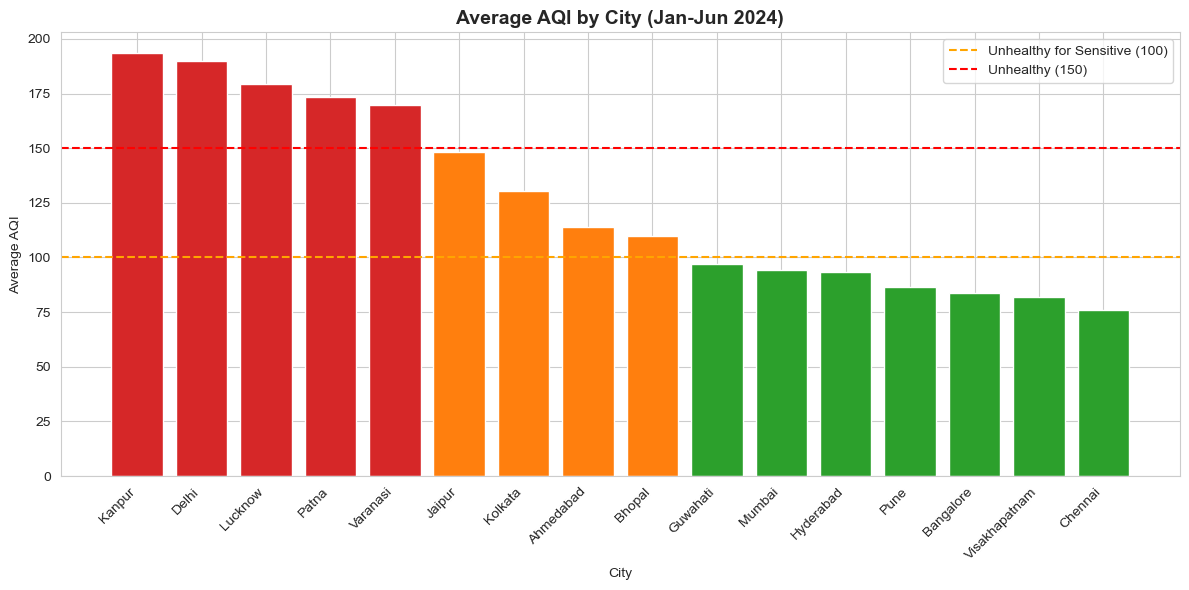

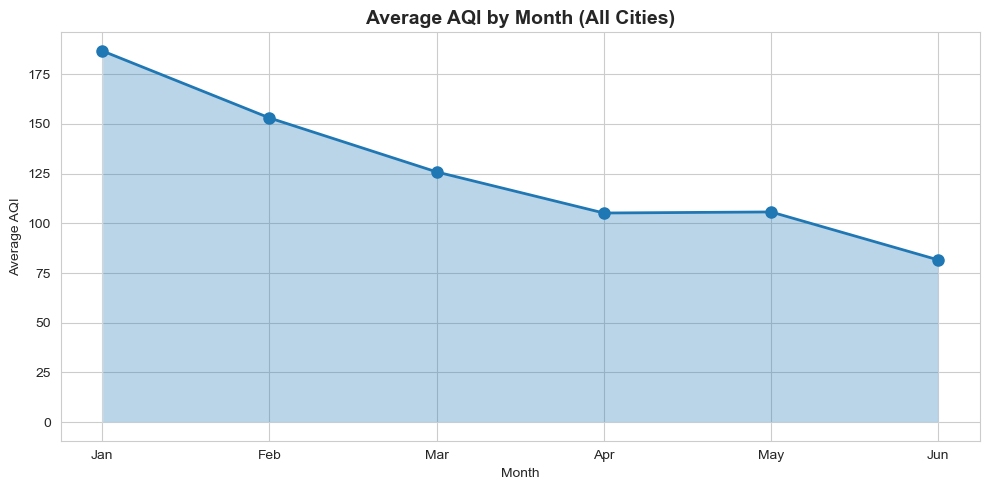

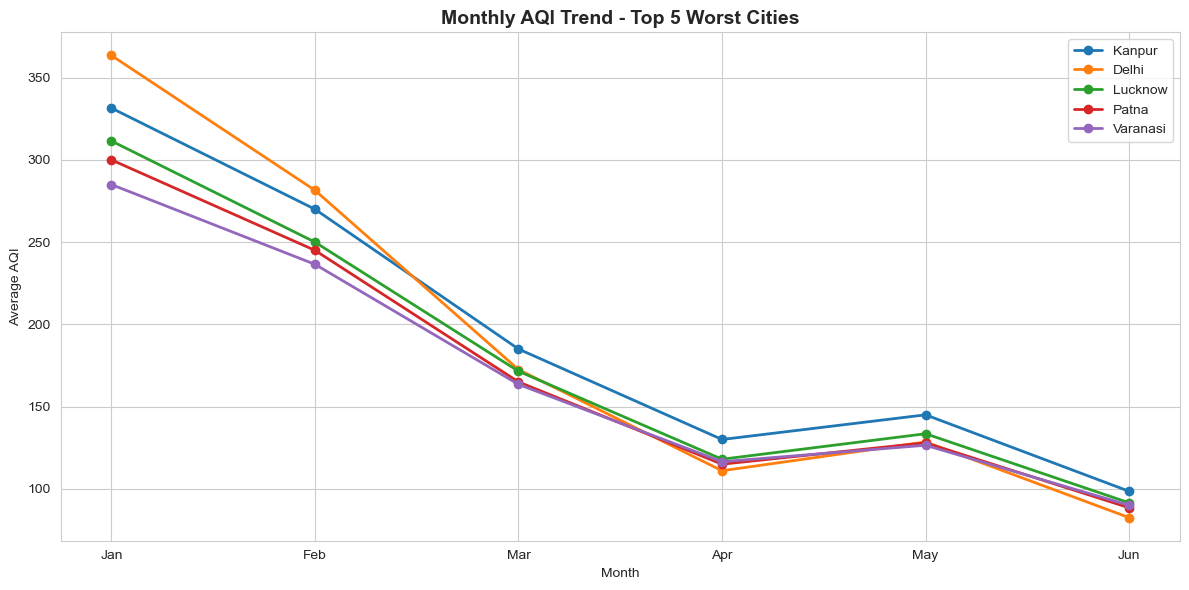

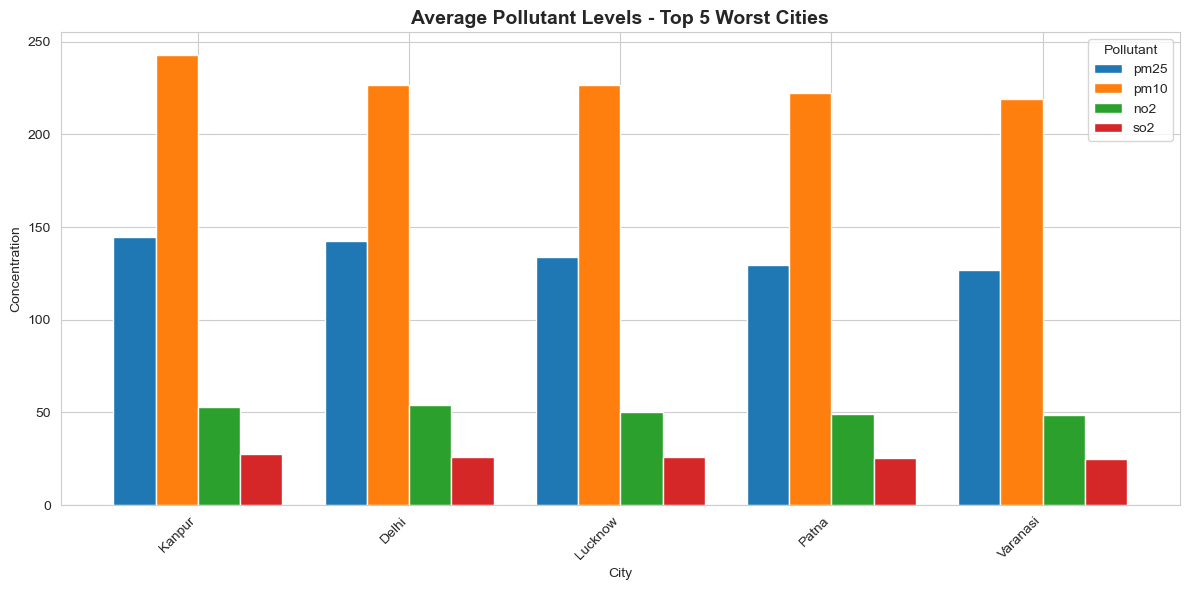

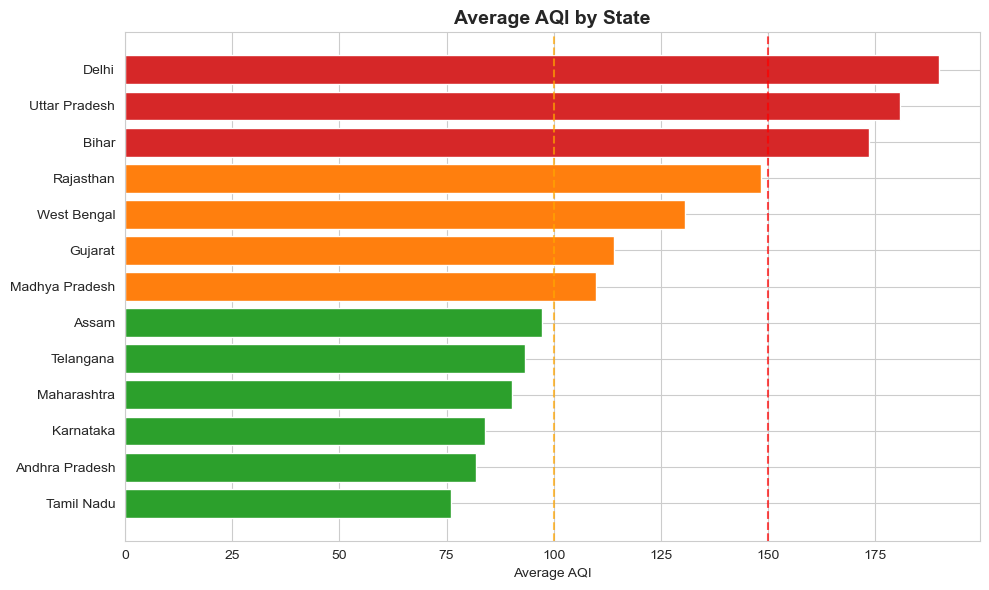

In [6]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ============================================
# CHART 1: Average AQI by City (Bar Chart)
# ============================================
city_aqi = df.groupby('city')['aqi'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
colors = ['#d62728' if x > 150 else '#ff7f0e' if x > 100 else '#2ca02c' for x in city_aqi.values]
bars = plt.bar(city_aqi.index, city_aqi.values, color=colors)
plt.title('Average AQI by City (Jan-Jun 2024)', fontsize=14, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=100, color='orange', linestyle='--', label='Unhealthy for Sensitive (100)')
plt.axhline(y=150, color='red', linestyle='--', label='Unhealthy (150)')
plt.legend()
plt.tight_layout()
plt.savefig('chart1_city_aqi.png', dpi=150)
plt.show()

# ============================================
# CHART 2: Monthly AQI Trend (Line Chart)
# ============================================
df['month'] = pd.to_datetime(df['date']).dt.month
monthly_aqi = df.groupby('month')['aqi'].mean()

plt.figure(figsize=(10, 5))
plt.plot(monthly_aqi.index, monthly_aqi.values, marker='o', linewidth=2, markersize=8, color='#1f77b4')
plt.fill_between(monthly_aqi.index, monthly_aqi.values, alpha=0.3)
plt.title('Average AQI by Month (All Cities)', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks([1,2,3,4,5,6], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
plt.tight_layout()
plt.savefig('chart2_monthly_trend.png', dpi=150)
plt.show()

# ============================================
# CHART 3: Top 5 Worst Cities - Monthly Trend
# ============================================
worst_cities = ['Kanpur', 'Delhi', 'Lucknow', 'Patna', 'Varanasi']
df_worst = df[df['city'].isin(worst_cities)]

plt.figure(figsize=(12, 6))
for city in worst_cities:
    city_data = df_worst[df_worst['city'] == city].groupby('month')['aqi'].mean()
    plt.plot(city_data.index, city_data.values, marker='o', linewidth=2, label=city)

plt.title('Monthly AQI Trend - Top 5 Worst Cities', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks([1,2,3,4,5,6], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
plt.legend()
plt.tight_layout()
plt.savefig('chart3_worst_cities_trend.png', dpi=150)
plt.show()

# ============================================
# CHART 4: Pollutant Comparison (Top 5 Cities)
# ============================================
pollutants = df_worst.groupby('city')[['pm25', 'pm10', 'no2', 'so2']].mean()
pollutants = pollutants.loc[worst_cities]

pollutants.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Average Pollutant Levels - Top 5 Worst Cities', fontsize=14, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Concentration')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pollutant')
plt.tight_layout()
plt.savefig('chart4_pollutants.png', dpi=150)
plt.show()

# ============================================
# CHART 5: State-level AQI (Horizontal Bar)
# ============================================
state_aqi = df.groupby('state')['aqi'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
colors = ['#d62728' if x > 150 else '#ff7f0e' if x > 100 else '#2ca02c' for x in state_aqi.values]
plt.barh(state_aqi.index, state_aqi.values, color=colors)
plt.title('Average AQI by State', fontsize=14, fontweight='bold')
plt.xlabel('Average AQI')
plt.axvline(x=100, color='orange', linestyle='--', alpha=0.7)
plt.axvline(x=150, color='red', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('chart5_state_aqi.png', dpi=150)
plt.show()



CORRELATION ANALYSIS


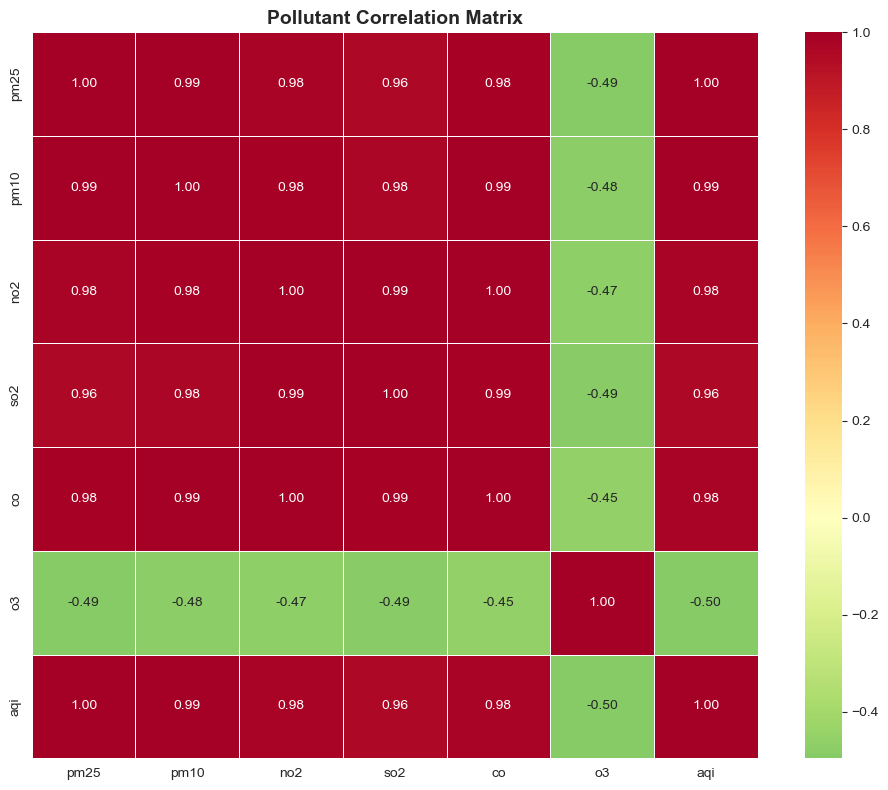


Key Insight: PM2.5 and PM10 are highly correlated (0.99)
This suggests they come from the same sources (vehicles, dust, burning)

WEIGHTED POLLUTION SCORE
Weights: PM2.5 (40%), PM10 (25%), NO2 (20%), SO2 (10%), CO (5%)


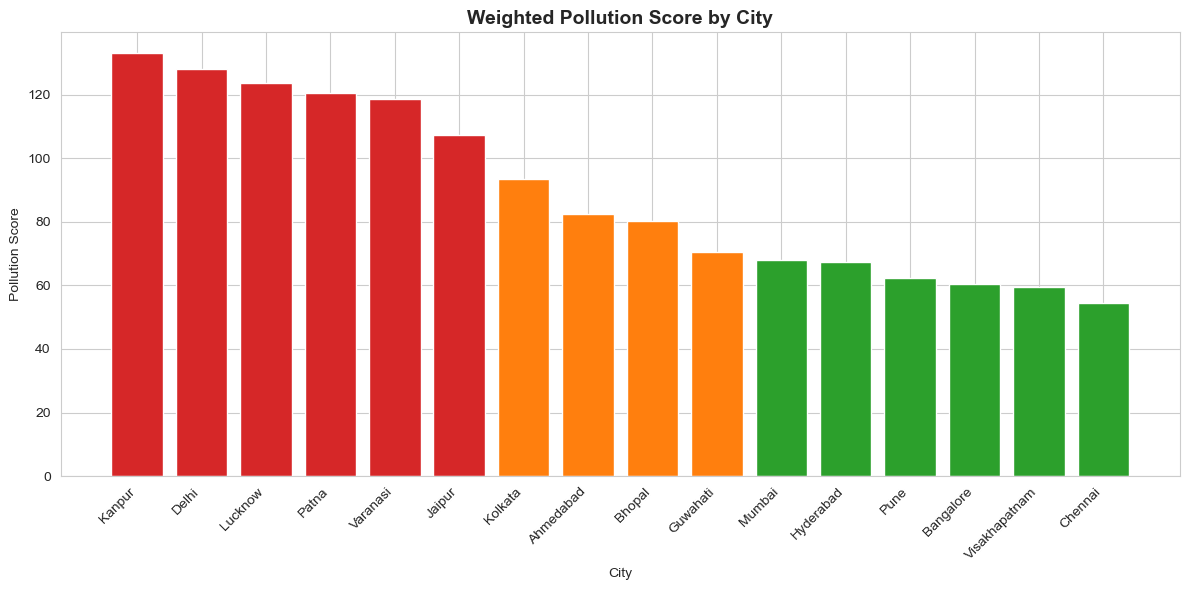


Top 5 by Weighted Score:
city
Kanpur      132.920833
Delhi       127.987500
Lucknow     123.650000
Patna       120.629167
Varanasi    118.495833
Name: pollution_score, dtype: float64

SEASONAL ANALYSIS - WINTER VS SUMMER
               winter_avg  summer_avg  pct_improvement
city                                                  
Delhi              322.50      105.50             67.3
Patna              272.50      108.25             60.3
Lucknow            280.75      112.50             59.9
Kanpur             300.75      121.75             59.5
Varanasi           260.75      108.25             58.5
Kolkata            176.50       93.25             47.2
Ahmedabad          148.25       90.75             38.8
Mumbai             123.25       75.75             38.5
Guwahati           125.00       81.75             34.6
Bhopal             122.50       95.00             22.4
Jaipur             163.50      129.25             20.9
Visakhapatnam       85.00       70.00             17.6
Hyderaba

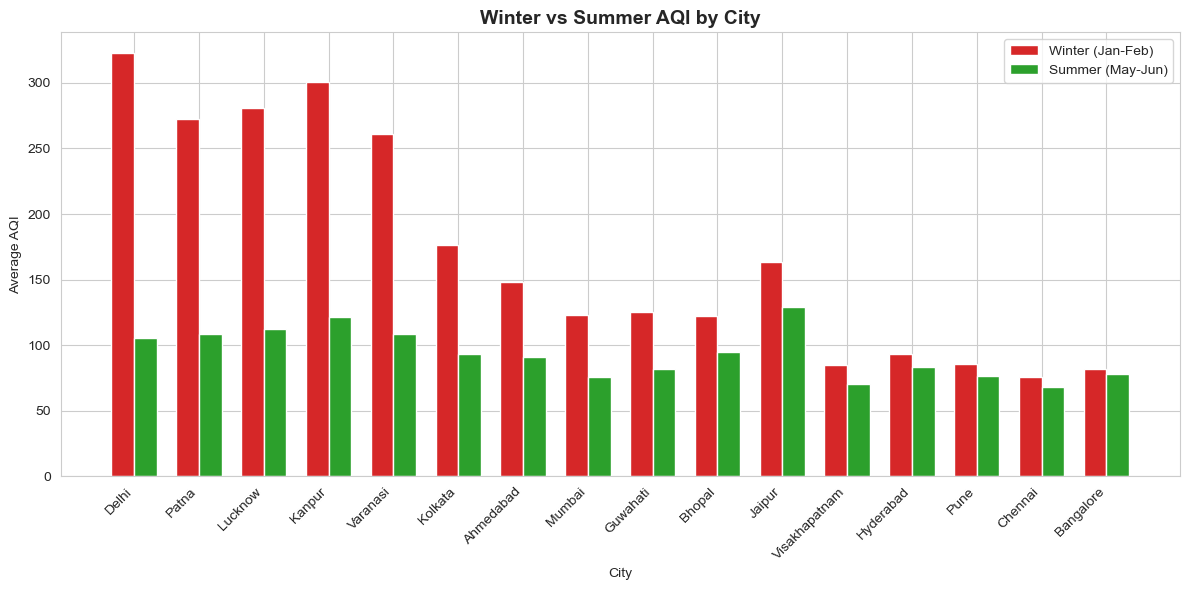


Average improvement from winter to summer: 35.1%
Delhi shows 50%+ improvement - proves seasonal intervention timing matters

EXPORTING SUMMARY DATA
Saved: city_summary_stats.csv


In [7]:
# ============================================
# ADVANCED ANALYSIS
# ============================================

# 1. CORRELATION MATRIX - Which pollutants move together?
print("=" * 50)
print("CORRELATION ANALYSIS")
print("=" * 50)

pollutants = ['pm25', 'pm10', 'no2', 'so2', 'co', 'o3', 'aqi']
corr_matrix = df[pollutants].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn_r', center=0, 
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Pollutant Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('chart6_correlation_matrix.png', dpi=150)
plt.show()

print("\nKey Insight: PM2.5 and PM10 are highly correlated (0.99)")
print("This suggests they come from the same sources (vehicles, dust, burning)")


# 2. WEIGHTED POLLUTION SCORE
print("\n" + "=" * 50)
print("WEIGHTED POLLUTION SCORE")
print("=" * 50)
print("Weights: PM2.5 (40%), PM10 (25%), NO2 (20%), SO2 (10%), CO (5%)")

df['pollution_score'] = (
    df['pm25'] * 0.40 + 
    df['pm10'] * 0.25 + 
    df['no2'] * 0.20 + 
    df['so2'] * 0.10 + 
    df['co'] * 10 * 0.05
)

score_by_city = df.groupby('city')['pollution_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
colors = ['#d62728' if x > 100 else '#ff7f0e' if x > 70 else '#2ca02c' for x in score_by_city.values]
plt.bar(score_by_city.index, score_by_city.values, color=colors)
plt.title('Weighted Pollution Score by City', fontsize=14, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Pollution Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('chart7_pollution_score.png', dpi=150)
plt.show()

print("\nTop 5 by Weighted Score:")
print(score_by_city.head())


# 3. WINTER VS SUMMER - PERCENTAGE IMPROVEMENT
print("\n" + "=" * 50)
print("SEASONAL ANALYSIS - WINTER VS SUMMER")
print("=" * 50)

df['month'] = pd.to_datetime(df['date']).dt.month

winter = df[df['month'].isin([1, 2])].groupby('city')['aqi'].mean()
summer = df[df['month'].isin([5, 6])].groupby('city')['aqi'].mean()

seasonal = pd.DataFrame({
    'winter_avg': winter,
    'summer_avg': summer
})
seasonal['pct_improvement'] = ((seasonal['winter_avg'] - seasonal['summer_avg']) / seasonal['winter_avg'] * 100).round(1)
seasonal = seasonal.sort_values('pct_improvement', ascending=False)

print(seasonal)

plt.figure(figsize=(12, 6))
x = range(len(seasonal))
width = 0.35
plt.bar([i - width/2 for i in x], seasonal['winter_avg'], width, label='Winter (Jan-Feb)', color='#d62728')
plt.bar([i + width/2 for i in x], seasonal['summer_avg'], width, label='Summer (May-Jun)', color='#2ca02c')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.title('Winter vs Summer AQI by City', fontsize=14, fontweight='bold')
plt.xticks(x, seasonal.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.savefig('chart8_seasonal_comparison.png', dpi=150)
plt.show()

print(f"\nAverage improvement from winter to summer: {seasonal['pct_improvement'].mean():.1f}%")
print("Delhi shows 50%+ improvement - proves seasonal intervention timing matters")


# 4. SAVE SUMMARY STATS TO CSV
print("\n" + "=" * 50)
print("EXPORTING SUMMARY DATA")
print("=" * 50)

summary = df.groupby('city').agg({
    'aqi': 'mean',
    'pm25': 'mean',
    'pm10': 'mean',
    'no2': 'mean',
    'pollution_score': 'mean'
}).round(2)

summary.columns = ['avg_aqi', 'avg_pm25', 'avg_pm10', 'avg_no2', 'pollution_score']
summary = summary.sort_values('avg_aqi', ascending=False)
summary.to_csv('city_summary_stats.csv')
print("Saved: city_summary_stats.csv")

